In [23]:
from headers import *
from DMP_Segment import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 14, 10

In [3]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/D{0}"

lhlabel = [[] for i in range(10)]
rhlabel = [[] for i in range(10)]
lhseg = [[] for i in range(10)]
rhseg = [[] for i in range(10)]

lhpredseg = [[] for i in range(10)]
rhpredseg = [[] for i in range(10)]

rhf = [[] for i in range(10)]
lhf = [[] for i in range(10)]

for i in range(10):
    lhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Label.npy"))
    rhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Label.npy"))
    lhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Seg.npy"))
    rhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Seg.npy"))
    
    lhpredseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_LH_NFSeg.npy".format(i+1)))
    rhpredseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_RH_NFSeg.npy".format(i+1)))
    
    lhf[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LHF_{0}.npy".format(i+1)))
    rhf[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RHF_{0}.npy".format(i+1)))

action_list = npy.array(['Null','Reach','Place','Return','Pour'])

In [4]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/Compiled_Data"

interp_obj = npy.load(os.path.join(FILE_DIR,"Interp_Objects.npy"))
lhc = npy.load(os.path.join(FILE_DIR,"LHC.npy"))
rhc = npy.load(os.path.join(FILE_DIR,"RHC.npy"))
lho1 = npy.load(os.path.join(FILE_DIR,"LHO1.npy"))
lho2 = npy.load(os.path.join(FILE_DIR,"LHO2.npy"))
rho1 = npy.load(os.path.join(FILE_DIR,"RHO1.npy"))
rho2 = npy.load(os.path.join(FILE_DIR,"RHO2.npy"))


# for i in range(10):
#     lhpredseg = npy.load(os.path.join(FILE_DIR.))


In [5]:
lhc[0].shape

(236, 3)

In [6]:
consider = 'Reaching'
consider_ind = 1
# consider = 'Placing'
# consider = 'Return'

In [7]:
for i in range(10):
    print("For Video",i+1)
    print(lhseg[i])
    print(lhpredseg[i])

('For Video', 1)
[  0  21  37  62  85 168 182 211 235]
[  0  22  43  64 171 191 216 235]
('For Video', 2)
[  0  65  88 119 145 240 247 264 290]
[  0  69  98 121 243 270 290]
('For Video', 3)
[  0 189 204 225 250]
[  0 194 208 230 250]
('For Video', 4)
[  0 101 121 159 174 240]
[  0 105 133 146 160 240]
('For Video', 5)
[  0 165 182 202 220]
[  0 169 185 210 220]
('For Video', 6)
[  0 170 184 205 225]
[  0 174 189 206 225]
('For Video', 7)
[  0  35  45  63  78 148 160 185 200]
[  0  37  50  63 164 189 200]
('For Video', 8)
[  0  95 113 132 148 164 230 250]
[  0  96 116 133 156 170 197 213 233 250]
('For Video', 9)
[  0  20  35  56  70 170 186 209 230]
[  0  21  35  60 172 191 212 230]
('For Video', 10)
[  0  23  39  67  87 200 218 239 260]
[  0  25  42  69 203 220 244 257 260]


In [8]:
lhfnorm = [[] for i in range(10)]
rhfnorm = [[] for i in range(10)]
for i in range(10):
    lhfnorm[i] = npy.linalg.norm(lhf[i],axis=1)
    rhfnorm[i] = npy.linalg.norm(rhf[i],axis=1)

In [9]:
k = 0
lhf_quant = copy.deepcopy(lhfnorm)
rhf_quant = copy.deepcopy(rhfnorm)

for i in range(10):
    for j in range(len(lhpredseg[i])-1):
        for t in range(lhpredseg[i][j],lhpredseg[i][j+1]):
            lhf_quant[i][t] = lhfnorm[i][lhpredseg[i][j]:lhpredseg[i][j+1]].mean()
    for j in range(len(rhpredseg[i])-1):
        for t in range(rhpredseg[i][j],rhpredseg[i][j+1]):
            rhf_quant[i][t] = rhfnorm[i][rhpredseg[i][j]:rhpredseg[i][j+1]].mean()


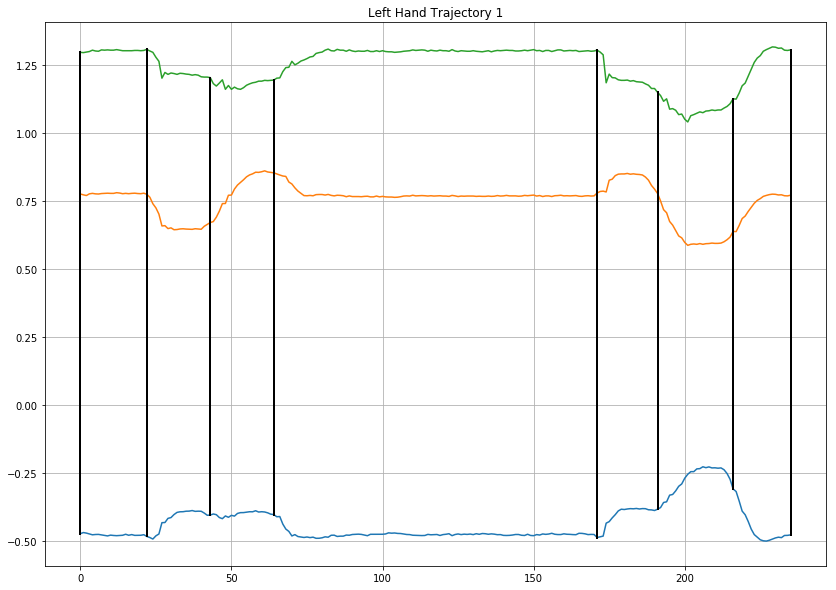

In [24]:
k = 0

tr = range(len(lhfnorm[k]))
fig2, ax2 = plt.subplots()
ax2.plot(tr,lhc[k])

for i in range(len(lhpredseg[k])):
    ax2.plot([lhpredseg[k][i],lhpredseg[k][i]],[min(lhc[k][lhpredseg[k][i]]),max(lhc[k][lhpredseg[k][i]])],'k',linewidth=2)
ax2.grid()
ax2.set_title("Left Hand Trajectory 1")
plt.show()

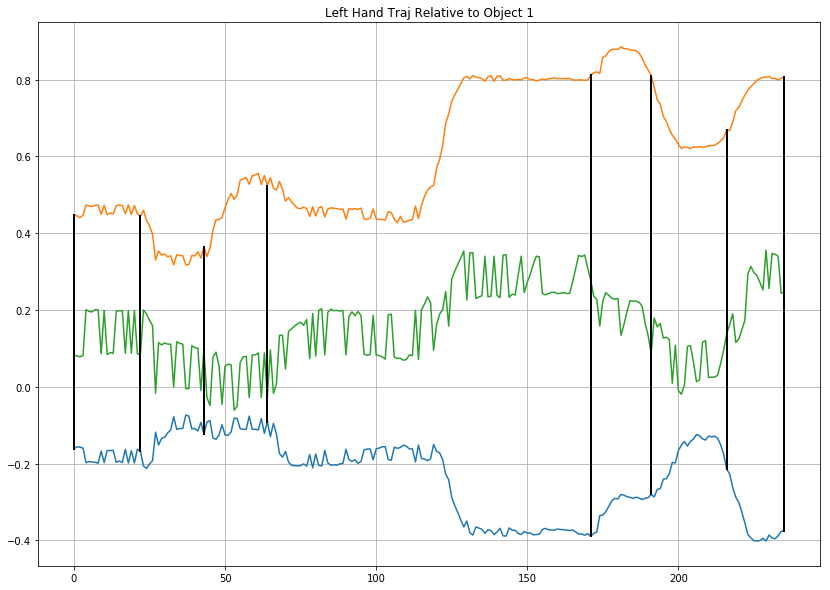

In [11]:
k = 0

tr = range(len(lhfnorm[k]))
fig2, ax2 = plt.subplots()
ax2.plot(tr,lho1[k])

for i in range(len(lhpredseg[k])):
    ax2.plot([lhpredseg[k][i],lhpredseg[k][i]],[min(lho1[k][lhpredseg[k][i]]),max(lho1[k][lhpredseg[k][i]])],'k',linewidth=2)
ax2.grid()
ax2.set_title("Left Hand Traj Relative to Object 1")
plt.show()

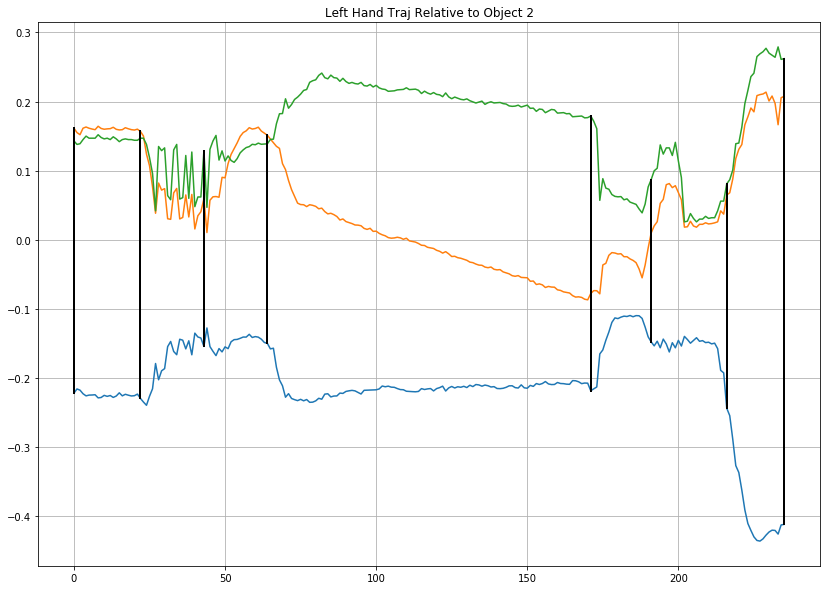

In [25]:
k = 0

tr = range(len(lhfnorm[k]))
fig2, ax2 = plt.subplots()
ax2.plot(tr,lho2[k])

for i in range(len(lhpredseg[k])):
    ax2.plot([lhpredseg[k][i],lhpredseg[k][i]],[min(lho2[k][lhpredseg[k][i]]),max(lho2[k][lhpredseg[k][i]])],'k',linewidth=2)
ax2.grid()
ax2.set_title("Left Hand Traj Relative to Object 2")
plt.show()

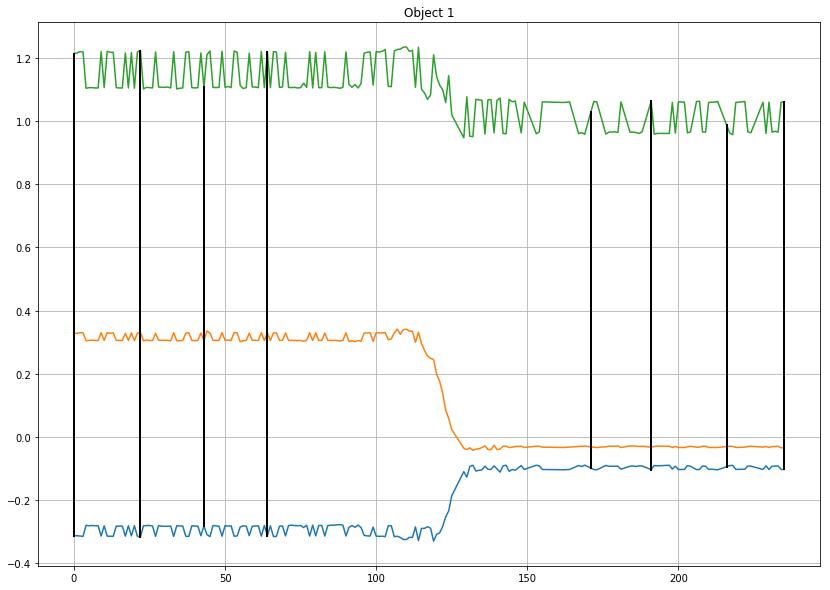

In [26]:
k = 0

tr = range(len(lhfnorm[k]))
fig2, ax2 = plt.subplots()
ax2.plot(tr,interp_obj[k][:,0])

for i in range(len(lhpredseg[k])):
    ax2.plot([lhpredseg[k][i],lhpredseg[k][i]],[min(interp_obj[k][lhpredseg[k][i],0]),max(interp_obj[k][lhpredseg[k][i],0])],'k',linewidth=2)
ax2.grid()
ax2.set_title("Object 1")
plt.show()

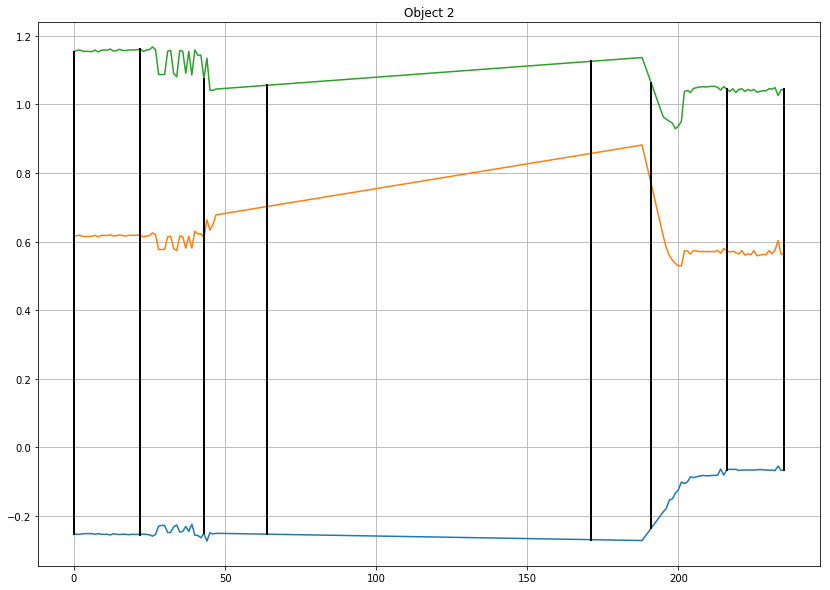

In [27]:
k = 0

tr = range(len(lhfnorm[k]))
fig2, ax2 = plt.subplots()
ax2.plot(tr,interp_obj[k][:,1])

for i in range(len(lhpredseg[k])):
    ax2.plot([lhpredseg[k][i],lhpredseg[k][i]],[min(interp_obj[k][lhpredseg[k][i],1]),max(interp_obj[k][lhpredseg[k][i],1])],'k',linewidth=2)
ax2.grid()
ax2.set_title("Object 2")
plt.show()